In [1]:
%load_ext dotenv
%dotenv 
import os
import sys
sys.path.append(os.getenv('SRC_DIR'))
from logger import get_logger
_logs = get_logger(__name__)

In [2]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob

In [3]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir+'/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index()

# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [31]:
df.sample(n = 5)

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
1910292,CTRA,2016-02-18,20.530001,20.530001,19.309999,19.549999,19.549999,9190800,Energy,Oil & Gas Exploration & Production,2016,20.490000,-0.045876,0,1.0
494162,SJM,2008-09-12,52.029999,52.639999,52.000000,52.340000,52.340000,404400,Consumer Staples,Packaged Foods & Meats,2008,52.860001,-0.009837,0,0.0
2363702,HOLX,2015-02-17,30.459999,30.590000,30.209999,30.510000,30.510000,1895400,Health Care,Health Care Equipment,2015,30.459999,0.001642,1,1.0
571331,TDY,2017-04-04,125.980003,126.919998,124.779999,125.730003,125.730003,118900,Information Technology,Electronic Equipment & Instruments,2017,126.019997,-0.002301,0,0.0
1221441,DAL,2008-02-04,18.440001,18.790001,17.100000,17.250000,17.250000,5381900,Industrials,Passenger Airlines,2008,18.530001,-0.069077,0,0.0


In [40]:
# select_tickers = df['ticker'].unique().tolist()[0:9]
select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers

['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

In [47]:
idx = df['ticker'].isin(select_tickers)
small_df = df[idx]
simple_sample_dt = small_df.sample(frac = 0.1)
simple_sample_dt.shape, small_df.shape

((5429, 15), (54290, 15))

Look at the distribution of tickers.

<Axes: xlabel='ticker'>

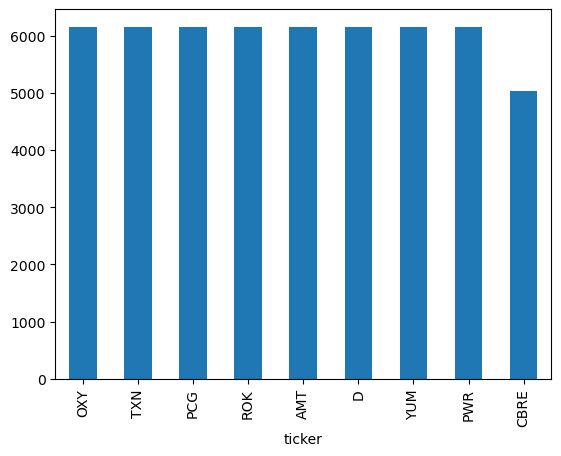

In [107]:
small_df['ticker'].value_counts().plot(kind='bar')

<Axes: xlabel='ticker'>

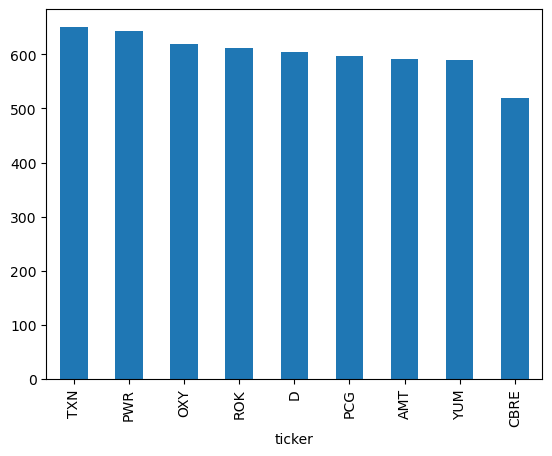

In [108]:
simple_sample_dt['ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: xlabel='ticker'>

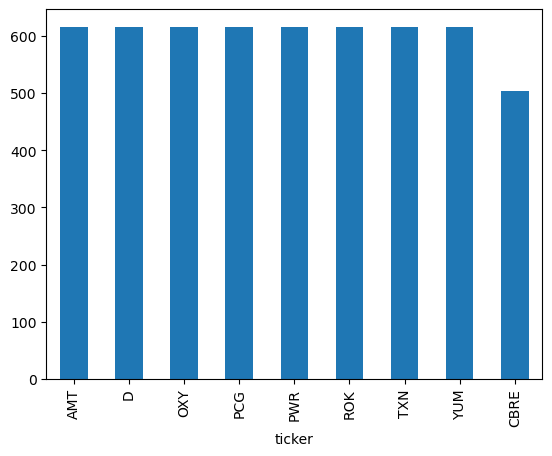

In [109]:
strat_sample_dt = small_df.groupby(['ticker']).sample(frac = 0.1)
strat_sample_dt['ticker'].value_counts().plot(kind='bar')

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\JesusCalderon\AppData\Local\Temp\ipykernel_30644\2932236319.py:4: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  .apply(lambda x: x.sample(frac = 0.1))


<Axes: xlabel='ticker'>

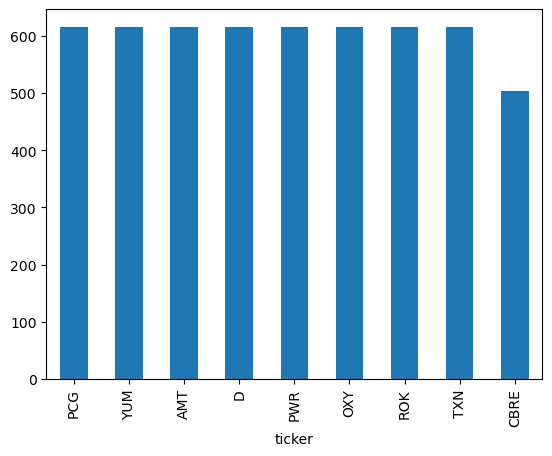

In [110]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('ticker', group_keys=False)
                      .apply(lambda x: x.sample(frac = 0.1))
                      .compute()
                      .reset_index())
strat_sample_dd_dt[strat_sample_dd_dt['ticker'].isin(select_tickers)]['ticker'].value_counts().plot(kind='bar')